In [14]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=0.30,shear_range=0.20,zoom_range=0.20)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_data_gen.flow_from_directory(
        r'D:\ITI\Graduation_project\dataset\data\train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [4]:
validation_generator = validation_data_gen.flow_from_directory(
        r'D:\ITI\Graduation_project\dataset\data\test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [5]:
mod_model = Sequential()

mod_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
mod_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
mod_model.add(MaxPooling2D(pool_size=(2, 2)))
mod_model.add(Dropout(0.25))

mod_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
mod_model.add(MaxPooling2D(pool_size=(2, 2)))
mod_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
mod_model.add(MaxPooling2D(pool_size=(2, 2)))
mod_model.add(Dropout(0.25))

mod_model.add(Flatten())
mod_model.add(Dense(1024, activation='relu'))
mod_model.add(Dropout(0.5))
mod_model.add(Dense(512, activation='relu'))
mod_model.add(Dropout(0.25))
mod_model.add(Dense(7, activation='softmax'))

In [6]:
mod_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

In [7]:
emotion_model_info = mod_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=120,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

<ipython-input-7-c6d5f9dc7de7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = mod_model.fit_generator(


Epoch 1/120
448/448 [==============================] - 248s 552ms/step - loss: 1.8214 - accuracy: 0.2478 - val_loss: 1.7858 - val_accuracy: 0.2539
Epoch 2/120
448/448 [==============================] - 240s 536ms/step - loss: 1.7161 - accuracy: 0.3103 - val_loss: 1.6002 - val_accuracy: 0.3892
Epoch 3/120
448/448 [==============================] - 237s 528ms/step - loss: 1.6185 - accuracy: 0.3659 - val_loss: 1.5135 - val_accuracy: 0.4229
Epoch 4/120
448/448 [==============================] - 236s 527ms/step - loss: 1.5561 - accuracy: 0.3962 - val_loss: 1.4520 - val_accuracy: 0.4446
Epoch 5/120
448/448 [==============================] - 234s 523ms/step - loss: 1.5032 - accuracy: 0.4197 - val_loss: 1.3931 - val_accuracy: 0.4661
Epoch 6/120
448/448 [==============================] - 233s 520ms/step - loss: 1.4548 - accuracy: 0.4404 - val_loss: 1.3468 - val_accuracy: 0.4872
Epoch 7/120
448/448 [==============================] - 239s 535ms/step - loss: 1.4127 - accuracy: 0.4584 - val_loss: 1

In [12]:
mod_model_json = mod_model.to_json()
with open("mod_model.json", "w") as json_file:
    json_file.write(mod_model_json)

In [13]:
mod_model.save_weights('mod_emotion_model.h5')

In [ ]:
mod_model.load_weights('mod_emotion_model.h5')

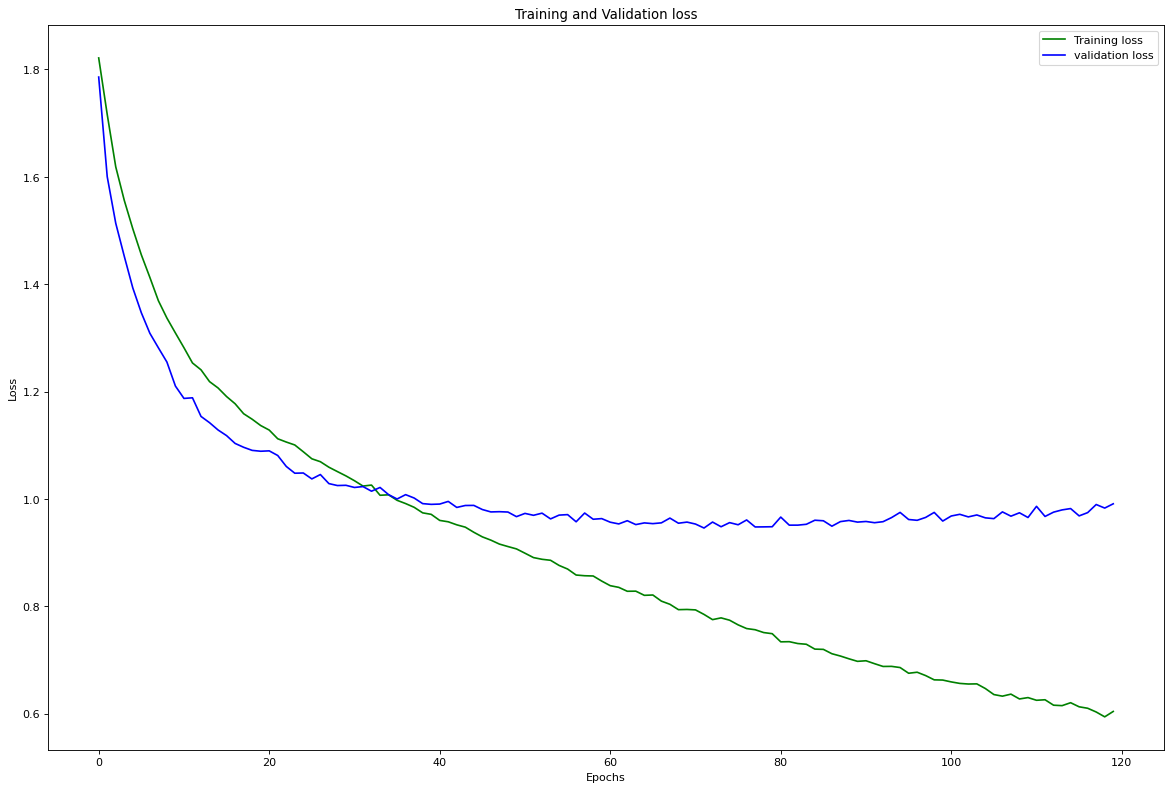

In [30]:
from matplotlib.pyplot import figure

figure(figsize=(18, 12), dpi=80)

loss_train = emotion_model_info.history['loss']
loss_val = emotion_model_info.history['val_loss']
epochs = range(0,120)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig('Loss.png',)

plt.show()

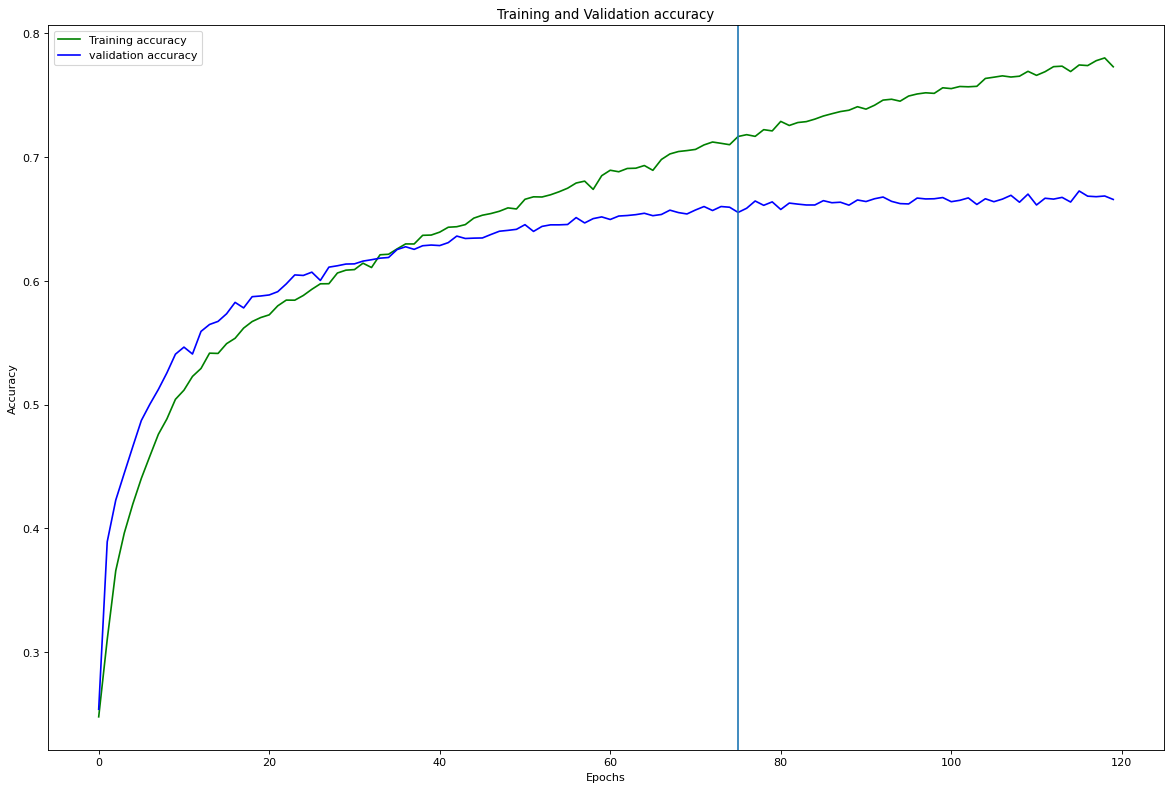

In [37]:
from matplotlib.pyplot import figure


loss_train = emotion_model_info.history['accuracy']
loss_val = emotion_model_info.history['val_accuracy']
epochs = range(0,120)

figure(figsize=(18, 12), dpi=80)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.axvline(75)
plt.savefig('Accuracy.png')
plt.show()


In [39]:
emotion_model_info.history['val_accuracy'][73:78]

[0.6600167155265808,
 0.6594586968421936,
 0.6552734375,
 0.6586216688156128,
 0.6644810438156128]